In [ ]:
### Insights
1. **User Engagement & Purchases**
- the scatterplot shows that engagement time does not necessarily correlate with increased purchases

2. **Sponsorship Interactions**
- users with higher sponsorship interactions slightly tend to have increased purchases

3. **Classification Report**
- the model's metrics indicate a need for additional features to better distinguish the difference between likely purchasers and non-purchasers

### Recommendations
- Increase engagement opportunities tied to purchasing incentives
- Personalize offers for users with moderate or high sponsorship interactions
- Incorporate more behavioral metrics, such as the time of engagement

### New Fan Challenge: Fanatic Point System
- make a new metric that measures the status of fanatics the users are (bronze, silver, and gold)
- make a public leaderboard showcasing the top users 
- allow users to earn points when interacting with sponsors (ads)
- points can be used to redeem for discounts on merch 
- users with high points can also have early access to limited-edition items 
- or make exclusive items for users with higher points 
### Predicted Outcomes 
- increased engagement, people always have a competitive spirit in them
- boost in merchandise, more sponsor interactions with discounts would result in increased merch purchasing 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

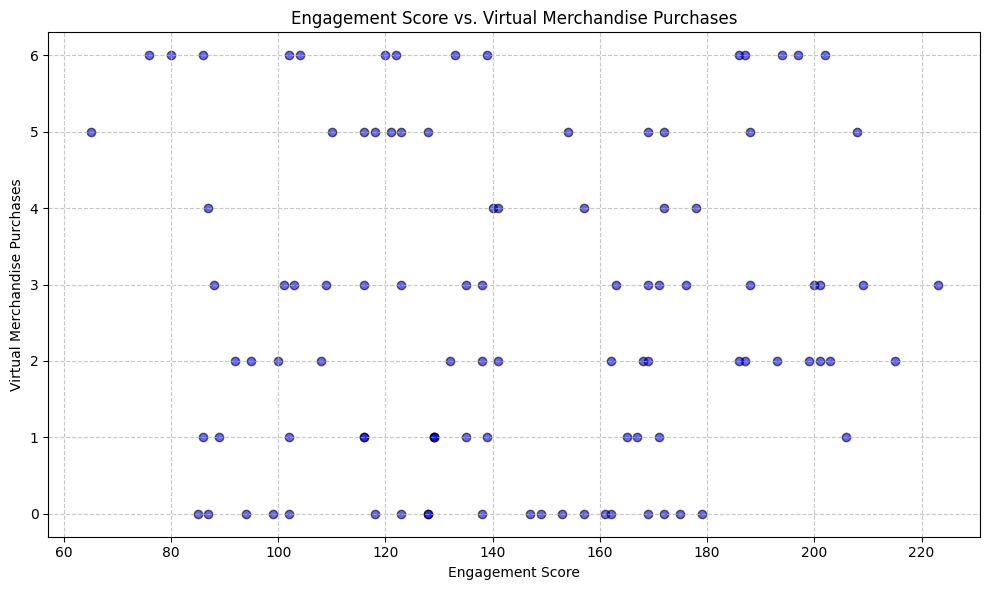

In [3]:
data = pd.read_csv('Data.csv')

data['Virtual Merchandise Purchases'] = pd.to_numeric(data['Virtual Merchandise Purchases'], errors='coerce')

# Create an engagement score
data['Engagement Score'] = (data['Fan Challenges Completed'] + 
                            data['Sponsorship Interactions (Ad Clicks)'] + 
                            data['Time on Live 360 (mins)'])

plt.figure(figsize=(10, 6))
plt.scatter(data['Engagement Score'], data['Virtual Merchandise Purchases'], alpha=0.6, color='blue', edgecolor='k')
plt.title('Engagement Score vs. Virtual Merchandise Purchases')
plt.xlabel('Engagement Score')
plt.ylabel('Virtual Merchandise Purchases')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


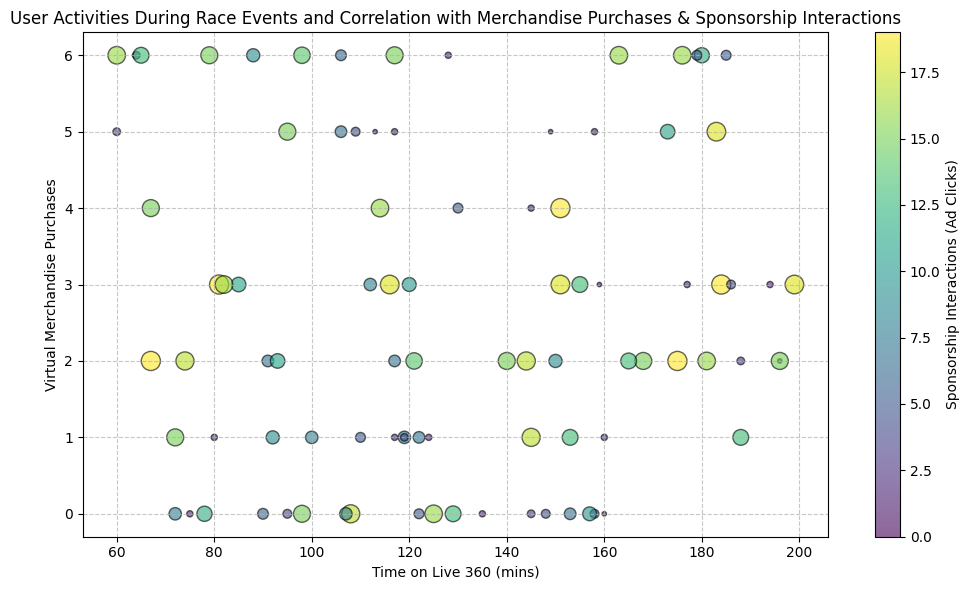

In [28]:
x = data['Time on Live 360 (mins)']
y = data['Virtual Merchandise Purchases']
s = data['Sponsorship Interactions (Ad Clicks)']

plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, c=s, cmap='viridis', s=s*10, alpha=0.6, edgecolor='k')
plt.colorbar(scatter, label='Sponsorship Interactions (Ad Clicks)')
plt.title('User Activities During Race Events and Correlation with Merchandise Purchases & Sponsorship Interactions')
plt.xlabel('Time on Live 360 (mins)')
plt.ylabel('Virtual Merchandise Purchases')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

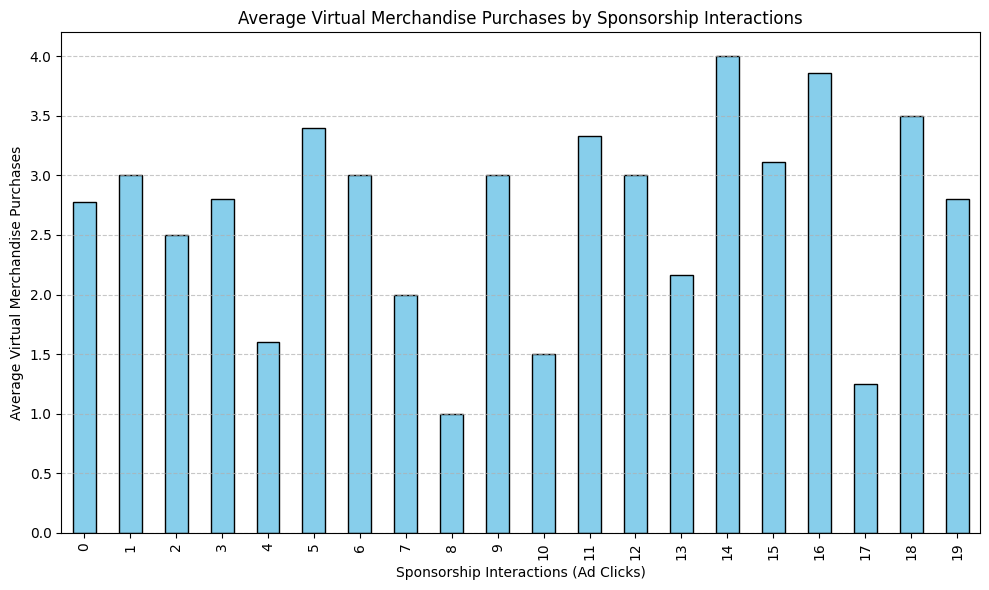

In [4]:
sponsorship_avg = data.groupby('Sponsorship Interactions (Ad Clicks)')['Virtual Merchandise Purchases'].mean()

plt.figure(figsize=(10, 6))
sponsorship_avg.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Virtual Merchandise Purchases by Sponsorship Interactions')
plt.xlabel('Sponsorship Interactions (Ad Clicks)')
plt.ylabel('Average Virtual Merchandise Purchases')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

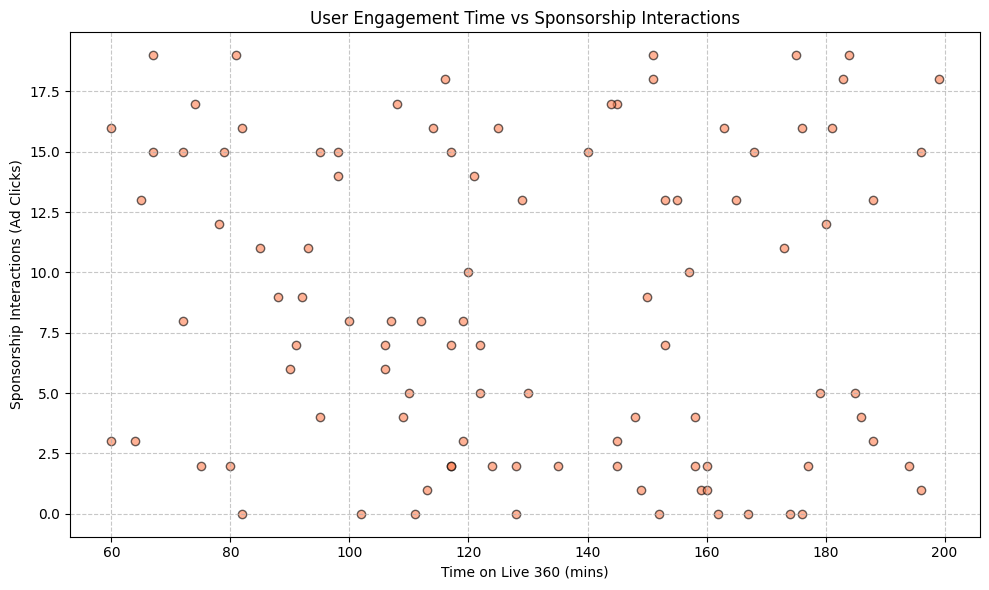

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Time on Live 360 (mins)'], data['Sponsorship Interactions (Ad Clicks)'],
            alpha=0.6, color='coral', edgecolor='k')
plt.title('User Engagement Time vs Sponsorship Interactions')
plt.xlabel('Time on Live 360 (mins)')
plt.ylabel('Sponsorship Interactions (Ad Clicks)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


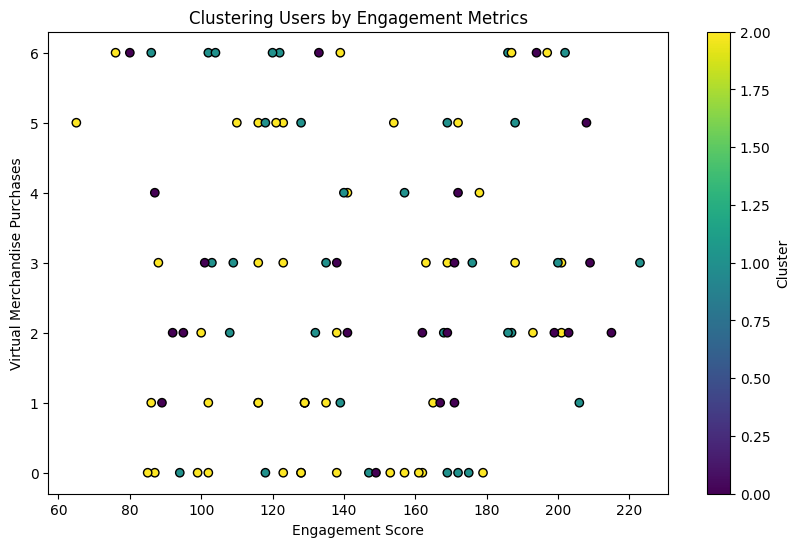

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Features for clustering
features = data[['Fan Challenges Completed', 'Sponsorship Interactions (Ad Clicks)', 'Time on Live 360 (mins)', 'Predictive Accuracy (%)']]

# Standardize features for better clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(10, 6))
plt.scatter(data['Engagement Score'], data['Virtual Merchandise Purchases'], c=data['Cluster'], cmap='viridis', edgecolor='k')
plt.title('Clustering Users by Engagement Metrics')
plt.xlabel('Engagement Score')
plt.ylabel('Virtual Merchandise Purchases')
plt.colorbar(label='Cluster')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create target variable: 1 if purchase > 0, else 0
data['Purchase'] = (data['Virtual Merchandise Purchases'] > 0).astype(int)

# Define features
features = ['Fan Challenges Completed', 'Sponsorship Interactions (Ad Clicks)', 
            'Time on Live 360 (mins)', 'Predictive Accuracy (%)']

X = data[features]
y = data['Purchase']

# Split the data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model with class weights
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the classification report for performance metrics
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.18      0.60      0.27         5
           1       0.85      0.44      0.58        25

    accuracy                           0.47        30
   macro avg       0.51      0.52      0.43        30
weighted avg       0.73      0.47      0.53        30

